# POVM Sampler Pub

This tutorial shows you how to input multiple circuits and parameter values to the `POVMSampler.run` method via _primitive unified blocs_ (PUBs).

In [1]:
%load_ext autoreload
%autoreload 2

## Interface of the `POVMSampler.run` method
The interface follows the style of the Qiskit V2 Primitives, which relies on PUBs. Each PUB is a tuple that contains a circuit and the data broadcasted to it. This greatly simplifies your ability to send complex data to a circuit.


the `run()` method takes an array of PUBs. Each PUB is in the format 
```python
(<single circuit>, <optional one or more parameter values>, <optional shots>, <optional POVM implementation>)
```

## First example
Let us look at a first simple example.

### Initialize QuantumCircuit and POVMSampler
The first step is to create the `qiskit.circuit.QuantumCircuits` from which you want to obtain the probability distribution with the `povm_toolbox.sampler.POVMSampler`.

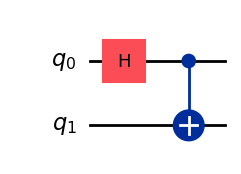

In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter

qc1 = QuantumCircuit(2)
qc1.h(0)
qc1.cx(0, 1)
qc1.draw("mpl", style="iqp")

### Initialize measurement procedure
Next, create a `povm_toolbox.library.POVMImplementation` instance.

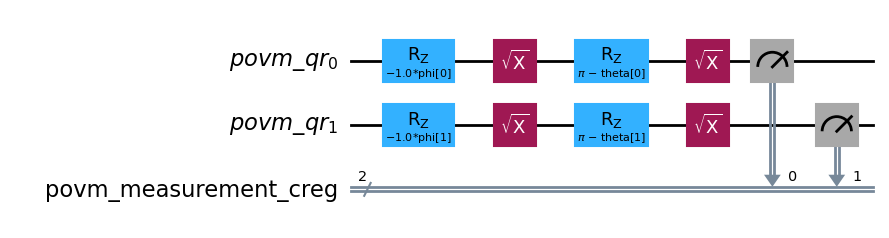

In [3]:
from povm_toolbox.library import ClassicalShadows

shots1 = 128
measurement1 = ClassicalShadows(n_qubit=2)
measurement1.msmt_qc.draw("mpl")

### Create the PUB
Finally, create the pub-like object, which is simply a tuple `(<single circuit>, <optional one or more parameter values>, <optional shots>, <optional POVM implementation>)`

In [4]:
pub1 = (qc1, None, shots1, measurement1)

## Second example
Let us look at an example where the full PUB is not specified.

### Initialize Quantum Circuits
The first step is to create the `qiskit.circuit.QuantumCircuits` from which you want to obtain the probability distribution with the `povm_toolbox.sampler.POVMSampler`.

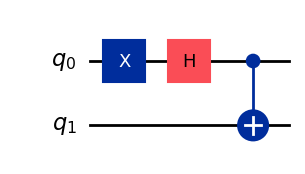

In [5]:
qc2 = QuantumCircuit(2)
qc2.x(0)
qc2.h(0)
qc2.cx(0, 1)
qc2.draw("mpl", style="iqp")

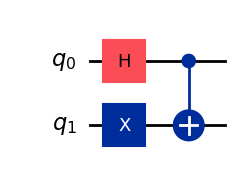

In [6]:
qc3 = QuantumCircuit(2)
qc3.h(0)
qc3.x(1)
qc3.cx(0, 1)
qc3.draw("mpl", style="iqp")

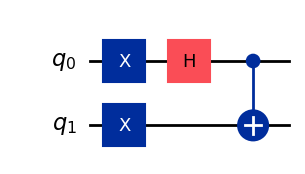

In [7]:
qc4 = QuantumCircuit(2)
qc4.x(0)
qc4.x(1)
qc4.h(0)
qc4.cx(0, 1)
qc4.draw("mpl", style="iqp")

### Create the PUBs
Finally, create the pub-like objects, which is simply a tuple `(<single circuit>, <optional one or more parameter values>, <optional shots>, <optional POVM implementation>)`.
Here we will use the fact that the last three items are optional because :
 - The circuits are not parametrized so there is no need to specify parameter values.
 - We assume a default number of shot will be supplied with the `POVMSampler.run` method.
 - We assume a default POVM implementation will be supplied with the `POVMSampler.run` method.

In [8]:
# All of the following syntax are equivalent:

pub2 = (qc2, None)  # or (qc2, None, None) or (qc2, None, None, None)
pub3 = (qc3,)
pub4 = qc4

### Set a default measurement procedure
We specify a `povm_toolbox.library.POVMImplementation` instance that will be the default one if no measurement is specified by a PUB.

In [9]:
shots_default = 2048
measurement_default = ClassicalShadows(n_qubit=2)

## Third example
Let's look at an example with a parametrized circuit. 

### Initialize QuantumCircuit and POVMSampler
The first step is to create the `qiskit.circuit.QuantumCircuits` from which you want to obtain the probability distribution with the `povm_toolbox.sampler.POVMSampler`.

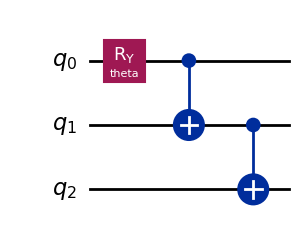

In [10]:
import numpy as np

qc5 = QuantumCircuit(3)

theta = Parameter("theta")
qc5.ry(theta, 0)
qc5.cx(0, 1)
qc5.cx(1, 2)
qc5.draw("mpl", style="iqp")

### Set the parameter values to bound to the `QuantumCircuit`
In this example the quantum circuit has a single parameter (`theta`). We can set different values for `theta`.

In [11]:
# Set 4 different values for theta
parameter_values = np.array([0.0, 0.4, 0.5 * np.pi, np.pi])

### Initialize measurement procedure
Next, create a `povm_toolbox.library.POVMImplementation` instance.

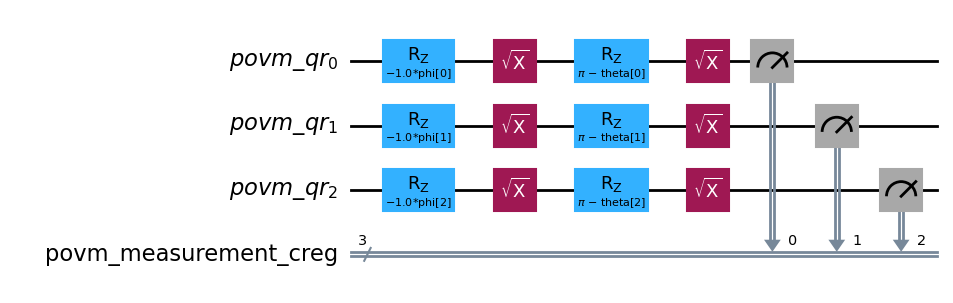

In [12]:
shots5 = 4096
measurement5 = ClassicalShadows(n_qubit=3)
measurement5.msmt_qc.draw("mpl")

### Create the PUB
Finally, create the pub-like object, which is simply a tuple `(<single circuit>, <optional one or more parameter values>, <optional shots>, <optional POVM implementation>)`

In [13]:
pub5 = (qc5, parameter_values, shots5, measurement5)

## Initialize the `POVMSampler`

In [14]:
from povm_toolbox.sampler import POVMSampler
from qiskit.primitives import StatevectorSampler as Sampler

sampler = Sampler()
povm_sampler = POVMSampler(sampler=sampler)

### Run and get results
Now that you have defined your `povm_sampler`, run it by calling the `povm_toolbox.sampler.POVMSampler.run` method, which returns an instance of `povm_toolbox.sampler.POVMSamplerJob`. You can get the results from the job (as a `qiskit.primitives.PrimitiveResult` object) with the `povm_toolbox.sampler.POVMSamplerJob.result` method.

In [15]:
job = povm_sampler.run(
    [pub1, pub2, pub3, pub4, pub5], shots=shots_default, povm=measurement_default
)
result = job.result()
print(result)

PrimitiveResult([POVMPubResult(data=DataBin<>(povm_measurement_creg=BitArray(<shape=(), num_shots=128, num_bits=2>)), metadata=RPMMetadata(povm_implementation=ClassicalShadows(n_qubits=2), composed_circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x12482cbc0>, pvm_keys=np.ndarray<128,2>)), POVMPubResult(data=DataBin<>(povm_measurement_creg=BitArray(<shape=(), num_shots=2048, num_bits=2>)), metadata=RPMMetadata(povm_implementation=ClassicalShadows(n_qubits=2), composed_circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x1249becc0>, pvm_keys=np.ndarray<2048,2>)), POVMPubResult(data=DataBin<>(povm_measurement_creg=BitArray(<shape=(), num_shots=2048, num_bits=2>)), metadata=RPMMetadata(povm_implementation=ClassicalShadows(n_qubits=2), composed_circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x1249be960>, pvm_keys=np.ndarray<2048,2>)), POVMPubResult(data=DataBin<>(povm_measurement_creg=BitArray(<shape=(), num_shots=2048, num_bits=2>)), metadata=R

In [16]:
for pub_result in result:
    print(pub_result.get_counts())

[Counter({(5, 4): 9, (0, 0): 8, (1, 1): 8, (4, 5): 7, (2, 4): 7, (1, 3): 6, (0, 2): 6, (1, 4): 6, (3, 3): 5, (2, 2): 5, (3, 0): 5, (3, 5): 5, (0, 5): 5, (4, 2): 5, (1, 5): 5, (4, 1): 4, (5, 2): 3, (5, 1): 3, (5, 0): 3, (2, 1): 3, (0, 4): 3, (2, 0): 3, (0, 3): 3, (3, 1): 2, (4, 0): 2, (3, 4): 2, (1, 2): 2, (4, 3): 1, (2, 5): 1, (5, 3): 1})]
[Counter({(0, 0): 127, (5, 5): 113, (4, 4): 112, (1, 1): 111, (2, 3): 110, (3, 2): 107, (3, 5): 76, (3, 1): 70, (0, 4): 69, (4, 1): 66, (5, 0): 66, (3, 0): 64, (4, 3): 64, (2, 0): 61, (0, 5): 61, (1, 3): 59, (1, 5): 58, (0, 2): 58, (1, 2): 57, (1, 4): 57, (2, 1): 55, (5, 3): 51, (2, 5): 51, (0, 3): 49, (3, 4): 49, (4, 2): 48, (5, 2): 48, (2, 4): 47, (4, 0): 47, (5, 1): 37})]
[Counter({(5, 5): 129, (0, 1): 126, (3, 3): 112, (2, 2): 107, (1, 0): 106, (4, 4): 104, (2, 0): 71, (0, 4): 67, (0, 3): 67, (0, 2): 64, (2, 1): 63, (1, 4): 62, (2, 5): 61, (4, 1): 60, (4, 3): 60, (5, 2): 60, (1, 3): 57, (1, 5): 56, (3, 5): 56, (3, 0): 55, (1, 2): 54, (5, 1): 54, 

In [17]:
from povm_toolbox.post_processor import POVMPostProcessor
from qiskit.quantum_info import SparsePauliOp

observable = SparsePauliOp(["II", "XX", "YY", "ZZ"], coeffs=[1, 1, -1, 1])

post_processor1 = POVMPostProcessor(result[0])
exp_value, std = post_processor1.get_expectation_value(observable=observable)
print(exp_value)

for pub_result in result[1:4]:
    post_processor = POVMPostProcessor(pub_result)
    exp_value, std = post_processor.get_expectation_value(observable=observable)
    print(exp_value)

3.9531249999999996
0.10351562500000011
-0.08105468749999978
0.16943359375000044


In [18]:
post_processor5 = POVMPostProcessor(result[4])
observable = SparsePauliOp(
    ["IIZ", "IXX", "YIY", "ZZI", "XXX", "XYZ"], coeffs=[1, 1, -1, 1, 0.5, -2]
)
exp_value, std = post_processor5.get_expectation_value(observable=observable)
print(exp_value)

[ 1.93359375  2.34155273  1.48278809 -0.37207031]


In [19]:
exp_value, std = post_processor5.get_expectation_value(observable=observable, loc=(1))
print(exp_value, "\u00b1", std)

2.341552734374999 ± 0.18304603652864754
